<a href="https://colab.research.google.com/github/Gilbert228/Orthopedic-Patient-Prediction/blob/main/Orthopedic_patient_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 1**

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
#Make a pandas DataFrame from the CSV
patient=pd.read_csv('/content/drive/MyDrive/Dataset/ortho_knnnb.csv')
patient.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [41]:
#How many variables does the dataset contain?
patient.shape

(310, 7)

In [42]:
#How many variables does the dataset contain?
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [43]:
patient['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [44]:
#converting the categorical value into numerical
categorical_value=patient['class']
categorical_value

0      Abnormal
1      Abnormal
2      Abnormal
3      Abnormal
4      Abnormal
         ...   
305      Normal
306      Normal
307      Normal
308      Normal
309      Normal
Name: class, Length: 310, dtype: object

In [45]:
#converting the categorical value into numerical
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
patient['class']=le.fit_transform(patient['class'])

In [46]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


In [47]:
patient.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0


In [48]:
#we have no missing vaues
patient.isnull().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

3- We are trying to predict if the patient has normal or abnormal biomechanical feature of orthopedic. Abnormal represent 0 and normal 1

4- We are trying to predict whether the patient is normal or abnormal

In [49]:
data=patient.drop(['class'],axis=1)


In [50]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(data)

In [52]:
scaled

array([[ 0.14708636,  0.50136873, -0.6651769 , -0.18495031, -1.4476468 ,
        -0.70805942],
       [-1.24586434, -0.74876898, -1.45300075, -1.0415207 , -0.26438488,
        -0.57955637],
       [ 0.4843695 ,  0.46793218, -0.09926175,  0.2730833 , -0.89768556,
        -0.79542095],
       ...,
       [ 0.05520137,  0.51561812, -0.31097748, -0.31356364,  0.58289256,
        -0.77348834],
       [-0.88582307, -0.88565951, -0.55861259, -0.47712775,  0.04702109,
        -0.69554822],
       [-1.54892681, -1.24785954, -0.82539423, -1.05855695,  0.45311695,
        -0.70658867]])

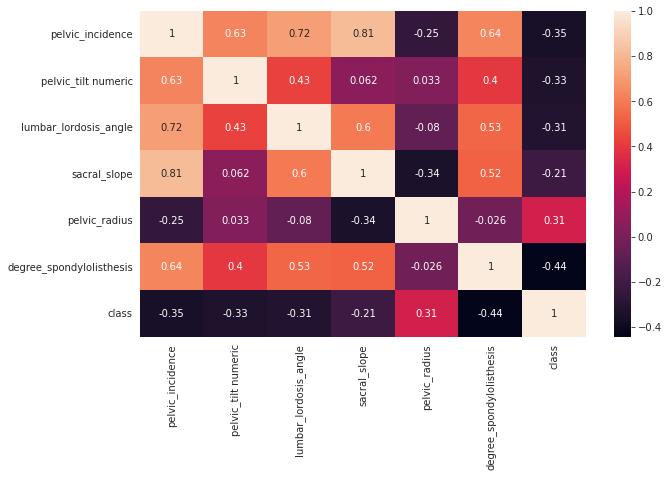

In [53]:
from seaborn import heatmap
plt.figure(figsize=(10,6))
sns.heatmap(patient.corr(), annot=True)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


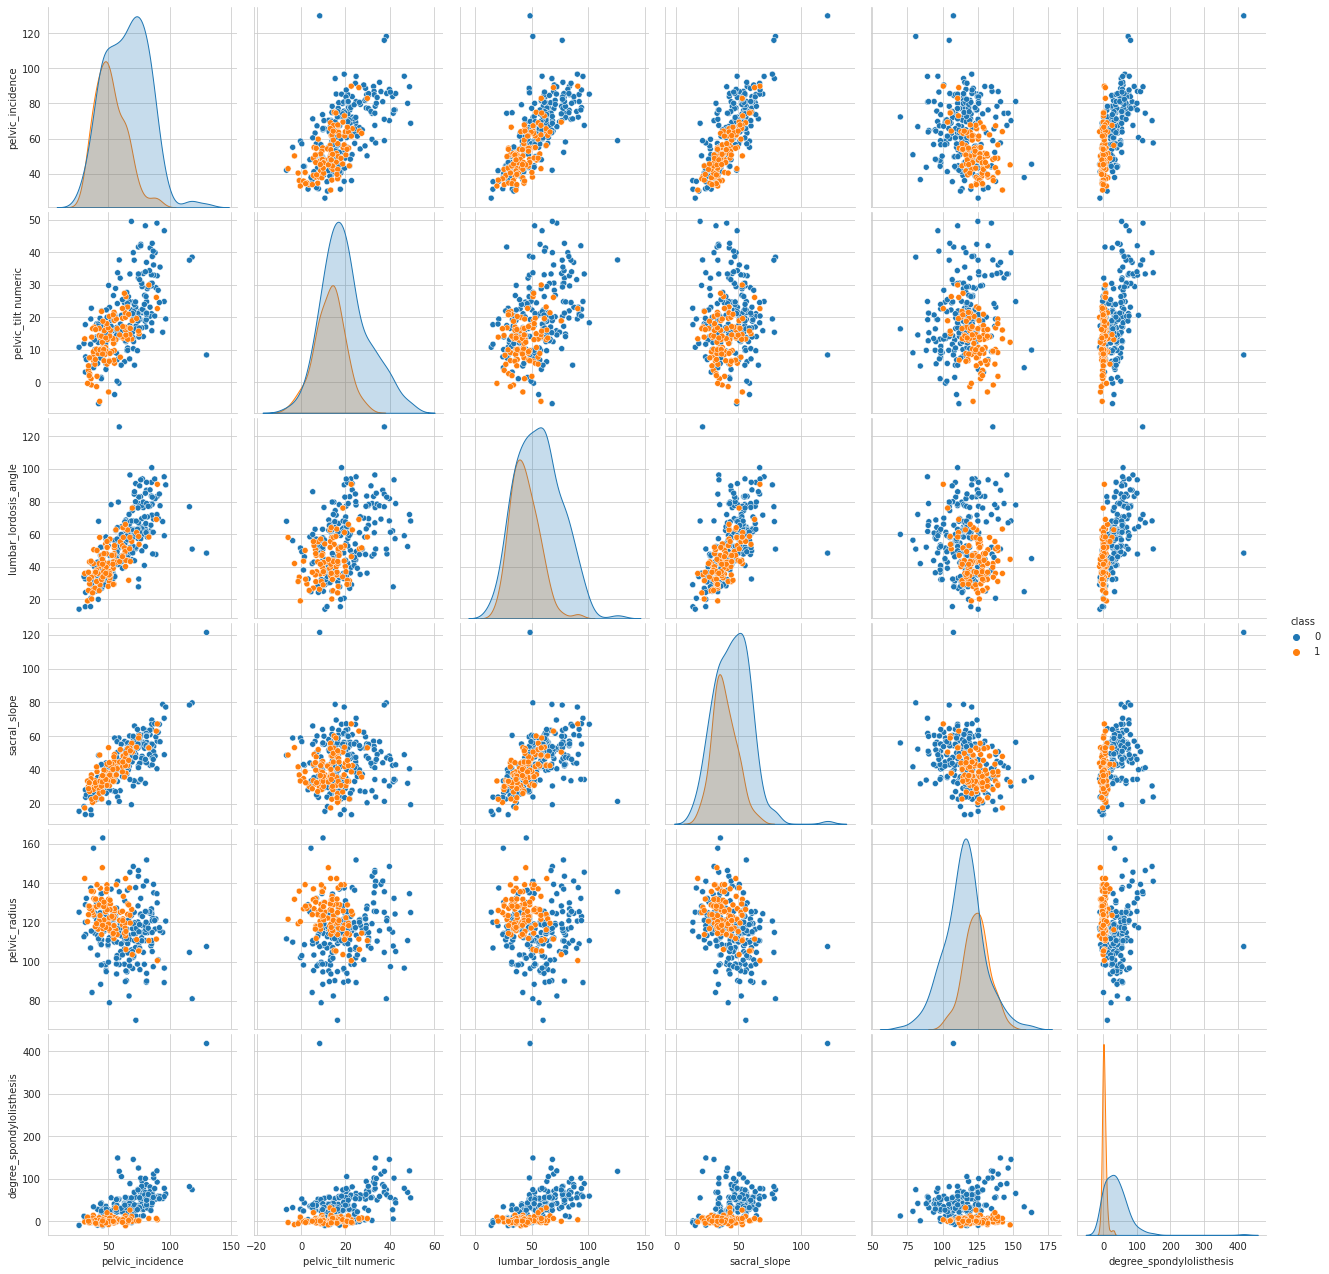

In [54]:
sns.set_style('whitegrid');
sns.pairplot(patient, hue='class', size=3);
plt.show()

In [55]:
x=patient.drop(['class'],axis=1)
y=patient['class']

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20, random_state=42)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
test_acc = []
value_k = []
for k in range(1, 10):
  knn=KNeighborsClassifier(n_neighbors=k)
  
  knn.fit(x_train,y_train)
  train_pred=knn.predict(x_train)
  train_score=accuracy_score(train_pred, y_train)*100
  test_pred=knn.predict(x_test)
  test_score=accuracy_score(y_test,test_pred)*100
  test_acc.append(test_score)
  value_k.append(k)
  print("Test Accuracy:", test_score, "value of K:",k)
  print('Train Accuracy', train_score, 'value of K',k)

Test Accuracy: 82.25806451612904 value of K: 1
Train Accuracy 100.0 value of K 1
Test Accuracy: 83.87096774193549 value of K: 2
Train Accuracy 92.74193548387096 value of K 2
Test Accuracy: 85.48387096774194 value of K: 3
Train Accuracy 91.12903225806451 value of K 3
Test Accuracy: 77.41935483870968 value of K: 4
Train Accuracy 90.7258064516129 value of K 4
Test Accuracy: 83.87096774193549 value of K: 5
Train Accuracy 89.91935483870968 value of K 5
Test Accuracy: 79.03225806451613 value of K: 6
Train Accuracy 89.51612903225806 value of K 6
Test Accuracy: 82.25806451612904 value of K: 7
Train Accuracy 90.32258064516128 value of K 7
Test Accuracy: 80.64516129032258 value of K: 8
Train Accuracy 91.53225806451613 value of K 8
Test Accuracy: 83.87096774193549 value of K: 9
Train Accuracy 88.30645161290323 value of K 9


After using different value of k, we noticed that the test accuracy is at his highest when K value is 3. KNN is generalized because the data are close.

In [58]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
test_pred=knn.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
report=classification_report(y_test,test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89        44
           1       0.71      0.83      0.77        18

    accuracy                           0.85        62
   macro avg       0.82      0.85      0.83        62
weighted avg       0.87      0.85      0.86        62



Naives bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
hit=GaussianNB()
hit.fit(x_train,y_train)


GaussianNB()

In [61]:
pred=hit.predict(x_test)
print(pred)

[1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1
 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0]


In [62]:
report=classification_report(y_test,pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        44
           1       0.60      0.83      0.70        18

    accuracy                           0.79        62
   macro avg       0.76      0.80      0.77        62
weighted avg       0.83      0.79      0.80        62



since the training and testing data prediction are close, our model is generalized model.

Both model are generalized model but in this case KNN is giving us the highest accuracy.